$$\def\data{ {\bf d}_\rm{obs}}
\def\vec{\bf}
\def\m{ {\bf m}}
\def\map{m_{\nu}}
\def\postcov{ \mathcal{C}_{\text{post}} }
\def\prcov{ \mathcal{C}_{\text{prior}} }
\def\matrix{\bf}
\def\Hmisfit{ \mathcal{H}_{\text{misfit}} }
\def\diag{\operatorname{diag}}
\def\Vr{{\matrix V}_r}
\def\Wr{{\matrix W}_r}
\def\Ir{{\matrix I}_r}
\def\Dr{{\matrix D}_r}
\def\H{{\matrix H} }
$$ 
# Bayesian quantification of parameter uncertainty:
## Estimating the Gaussian approximation of posterior pdf of the coefficient parameter field in an elliptic PDE

In this example we tackle the problem of quantifying the
uncertainty in the solution of an inverse problem governed by an
elliptic PDE via the Bayesian inference framework. 
Hence, we state the inverse problem as a
problem of statistical inference over the space of uncertain
parameters, which are to be inferred from data and a physical
model.  The resulting solution to the statistical inverse problem
is a posterior distribution that assigns to any candidate set of
parameter fields our belief (expressed as a probability) that a
member of this candidate set is the ``true'' parameter field that
gave rise to the observed data.

---
### Bayes' Theorem

The posterior probability distribution combines the prior pdf
$\mu_{\text{prior}}(m)$ over the parameter space, which encodes
any knowledge or assumptions about the parameter space that we may
wish to impose before the data are considered, with a likelihood pdf
$\pi_{\text{like}}(\data \; | \; m)$, which explicitly
represents the probability that a given parameter $m$
might give rise to the observed data $\data \in
\mathbb{R}^{n_t}$, namely:

$$
\begin{align}
d \mu_{\text{post}}(m | \data) \propto \pi_{\text{like}}(\data \,|\, m) \, d\mu_{\text{prior}}(m).
\end{align}
$$

Note that infinite-dimensional analog of Bayes's formula requires the use Radon-Nikodym derivatives instead of probability density functions.

---
### Gaussian prior and noise

#### The prior

We consider a Gaussian prior with mean ${m}_{\rm prior}$ and covariance $\prcov$, $\mu_{\rm prior} \sim \mathcal{N}({m}_{\rm prior}, \prcov)$. The covariance is given by the discretization of the inverse of differential operator $\mathcal{A}^{-2} = (-\gamma \Delta + \delta I)^{-2}$, where $\gamma$, $\delta > 0$ control the correlation length and the variance of the prior operator. This choice of prior ensures that it is a trace-class operator, guaranteeing bounded pointwise variance and a well-posed infinite-dimensional Bayesian inverse problem

#### The likelihood

$$
\data =  {\bf f}(m) + {\bf e }, \;\;\;  {\bf e} \sim \mathcal{N}({\bf 0}, {\bf \Gamma}_{\text{noise}} )
$$

$$
\pi_{\text like}(\data \; | \; m)  = \exp \left( - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}}\right)
$$

Here ${\bf f}$ is the parameter-to-observable map that takes a parameter vector $m$ and maps
it to the space observation vector $\data$.

In this application, ${\bf f}$ consists in the composition of a PDE solve (to compute the state $u$) and a pointwise observation of the state $u$ to extract the observation vector $\data$.

#### The posterior

$$
d\mu_{\text{post}}(m \; | \; \data)  \propto \exp \left( - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}} \! - \tfrac{1}{2}\parallel m - m_{\rm prior} \parallel^{2}_{\prcov^{-1}} \right)
$$

---
### The Laplace approximation to the posterior: $\nu \sim \mathcal{N}({\vec \map},\bf \postcov)$

The mean of the Laplace approximation posterior distribution, ${\map}$, is the
parameter maximizing the posterior, and
is known as the maximum a posteriori (MAP) point.  It can be found
by minimizing the negative log of the posterior, which amounts to
solving a deterministic inverse problem) with appropriately weighted norms,

$$
\map := \underset{m}{\arg \min} \; \mathcal{J}(m) \;:=\;
\Big( 
\frac{1}{2} \| {\bf f}(m) - \data \|^2_{ {\bf \Gamma}_{\text{noise}}^{-1}} 
+\frac{1}{2} \| m -m_{\rm prior} \|^2_{\prcov^{-1}} 
\Big).
$$

The posterior covariance matrix is then given by the inverse of
the Hessian matrix of $\mathcal{J}$ at $\map$, namely

$$
\postcov = \left(\Hmisfit(\map) + \prcov^{-1} \right)^{-1}
$$

The negative eigenvalues represent the directions in which by adding data, you increase the variance in the posterior (in that direction).

Statisticians talk about an expected covariance, but here we are localized, so there may be local directions in which variance is increased but on average, these directions are cancelled out throughtout the parameter space when we take an expectation for the covariance.

For Gaussian distribution, the curvature of the log distribution (b/c of the e^m formulation) is the inverse of covariance. 
The curvature of the log posterior at the MAP point. The curvature of the lognormal distribution is constant. 

You can evaluate the Hessian (or its action) before seeing the data or solving the inverse problem. 

What is left is the operator that induced the norm. 
$\Hmisfit(\map)$ must be SPD at the MAP point $\postcov$, if not you have two options:
    - Deflate (set to zero) the negative eigenvalues, best approximation of H misfit in the space of SPD operators
    - linearize the f(m) around the MAP point, transforming the nonlinear LS to a linear LS problem
    - corresponds to a guassian posterior, the hessian of the linearized problem is the inverse covariance, which is basically a local approximation.

---
### The generalized eigenvalue problem

$$
\def\matHmis{ {\H}_{\rm misfit}}
\def\Gpost{\boldsymbol{\Gamma}_{\rm post} }
\def\Gprior{ \boldsymbol{\Gamma}_{\rm prior} }
$$

In what follows we denote with $\matHmis, \Gpost, \Gprior \in \mathbb{R}^{n\times n}$ the matrices stemming from the discretization of the operators $\Hmisfit(\map)$, $\postcov$, $\prcov$ with respect to the unweighted Euclidean inner product.
Then we considered the symmetric generalized eigenvalue problem

$$
 \matHmis {\matrix V} = \Gprior^{-1} {\matrix V} {\matrix \Lambda},
$$

where ${\matrix \Lambda} = \diag(\lambda_i) \in \mathbb{R}^{n\times n}$
contains the generalized eigenvalues and the columns of ${\matrix V}\in
\mathbb R^{n\times n}$ the generalized eigenvectors such that 
${\matrix V}^T \Gprior^{-1} {\matrix V} = {\matrix I}$.

#### Randomized eigensolvers to construct the approximate spectral decomposition

When the generalized eigenvalues $\{\lambda_i\}$ decay rapidly, we can
extract a low-rank approximation of $\matHmis$ by retaining only the $r$
largest eigenvalues and corresponding eigenvectors,

$$
 \matHmis \approx \Gprior^{-1} \Vr {\matrix{\Lambda}}_r \Vr^T \Gprior^{-1},
$$

Here, $\Vr \in \mathbb{R}^{n\times r}$ contains only the $r$
generalized eigenvectors of $\matHmis$ that correspond to the $r$ largest eigenvalues,
which are assembled into the diagonal matrix ${\matrix{\Lambda}}_r = \diag
(\lambda_i) \in \mathbb{R}^{r \times r}$.

#### The approximate posterior covariance

Using the [Sherman–Morrison–Woodbury](https://en.wikipedia.org/wiki/Sherman–Morrison_formula) formula, we write

$$
\begin{align}
  \notag \Gpost = \left(\matHmis+ \Gprior^{-1}\right)^{-1}
  = \Gprior^{-1}-\Vr {\matrix{D}}_r \Vr^T +
  \mathcal{O}\left(\sum_{i=r+1}^{n} \frac{\lambda_i}{\lambda_i +
    1}\right),
\end{align}
$$

where ${\matrix{D}}_r :=\diag(\lambda_i/(\lambda_i+1)) \in
\mathbb{R}^{r\times r}$. The last term in this expression captures the
error due to truncation in terms of the discarded eigenvalues; this
provides a criterion for truncating the spectrum, namely that $r$ is
chosen such that $\lambda_r$ is small relative to 1. 

Therefore we can approximate the posterior covariance as

$$
\Gpost \approx \Gprior - \Vr {\matrix{D}}_r \Vr^T
$$

This correponds to a low-rank update where we remove variance in some directions.

---
#### Drawing samples from a Gaussian distribution with covariance $\Gpost$

Let ${\bf x}$ be a sample for the prior distribution, i.e. ${\bf x} \sim \mathcal{N}({\bf 0}, \Gprior)$, then, using the low rank approximation of the posterior covariance, we compute a sample ${\bf v} \sim \mathcal{N}({\bf 0}, \Gpost)$ as

$$
  {\bf v} = \big\{ \Vr \big[ ({\matrix{\Lambda}}_r +
    \Ir)^{-1/2} - \Ir \big] \Vr^T\Gprior^{-1}  + {\bf I} \big\} {\bf x} 
$$

(add map point after this, since it's variation around that)

Transforming sampling from prior into sampling from Laplacian approximation to the posterior. 

---

## This tutorial shows:

- Description of the inverse problem (the forward problem, the prior, and the misfit functional)
- Convergence of the inexact Newton-CG algorithm
- Low-rank-based approximation of the posterior covariance (built on a low-rank
approximation of the Hessian of the data misfit) 
- How to construct the low-rank approximation of the Hessian of the data misfit
- How to apply the inverse and square-root inverse Hessian to a vector efficiently
- Samples from the Gaussian approximation of the posterior

## Goals:

By the end of this notebook, you should be able to:

- Understand the Bayesian inverse framework
- Visualise and understand the results
- Modify the problem and code

## Mathematical tools used:

- Finite element method
- Derivation of gradiant and Hessian via the adjoint method
- inexact Newton-CG
- Armijo line search
- Bayes' formula
- randomized eigensolvers

## List of software used:

- <a href="http://fenicsproject.org/">FEniCS</a>, a parallel finite element element library for the discretization of partial differential equations
- <a href="http://www.mcs.anl.gov/petsc/">PETSc</a>, for scalable and efficient linear algebra operations and solvers
- <a href="http://matplotlib.org/">Matplotlib</a>, A great python package that I used for plotting many of the results
- <a href="http://www.numpy.org/">Numpy</a>, A python package for linear algebra.  While extensive, this is mostly used to compute means and sums in this notebook.

## 1. Load modules

In [1]:
from __future__ import absolute_import, division, print_function

import dolfin as dl
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hippylib as hp

import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

np.random.seed(seed=1)

## 2. Generate the true parameter

This function generates a random field with a prescribed anysotropic covariance function.

In [2]:
def true_model(prior):
    noise = dl.Vector()
    prior.init_vector(noise,"noise")
    hp.parRandom.normal(1., noise)
    
    mtrue = dl.Vector()
    prior.init_vector(mtrue, 0)
    prior.sample(noise,mtrue)
    return mtrue

## 3. Set up the mesh and finite element spaces

We compute a two dimensional mesh of a unit square with nx by ny elements.
We define a P2 finite element space for the *state* and *adjoint* variable and P1 for the *parameter*.

In [3]:
ndim = 2
nx = 32
ny = 32
mesh = dl.UnitSquareMesh(nx, ny)
Vh2 = dl.FunctionSpace(mesh, 'Lagrange', 2) # for more accuracy.
Vh1 = dl.FunctionSpace(mesh, 'Lagrange', 1)
Vh = [Vh2, Vh1, Vh2]
print( "Number of dofs: hp.STATE={0}, hp.PARAMETER={1}, hp.ADJOINT={2}".format(
    Vh[hp.STATE].dim(), Vh[hp.PARAMETER].dim(), Vh[hp.ADJOINT].dim()) ) # this is the convention in hippylib


Number of dofs: hp.STATE=4225, hp.PARAMETER=1089, hp.ADJOINT=4225


## 4. Set up the forward problem

Let $\Omega$ be the unit square in $\mathbb{R}^2$, and $\Gamma_D$, $\Gamma_N$  be the Dirichlet and Neumann portitions of the boundary $\partial \Omega$ (that is $\Gamma_D \cup \Gamma_N = \partial \Omega$, $\Gamma_D \cap \Gamma_N = \emptyset$). The forward problem reads

$$
\left\{
\begin{array}{ll}
\nabla \cdot \left( e^m \nabla u\right) = f & \text{in } \Omega\\
u = u_D & \text{on } \Gamma_D, \\
e^m \nabla u \cdot \boldsymbol{n} = 0 & \text{on } \Gamma_N,
\end{array}
\right.
$$

where $u \in \mathcal{V}$ is the state variable, and $m \in \mathcal{M}$ is the uncertain parameter. Here $\Gamma_D$ corresponds to the top and bottom sides of the unit square, and $\Gamma_N$ corresponds to the left and right sides.
We also let $f = 0$, and $u_D = 1$ on the top boundary and $u_D = 0$ on the bottom boundary.

To set up the forward problem we use the `PDEVariationalProblem` class, which requires the following inputs
- the finite element spaces for the state, parameter, and adjoint variables `Vh`
- the pde in weak form `pde_varf`
- the boundary conditions `bc` for the forward problem and `bc0` for the adjoint and incremental problems.

The `PDEVariationalProblem` class offer the following functionality:
- solving the forward/adjoint and incremental problems
- evaluate first and second partial derivative of the forward problem with respect to the state, parameter, and adojnt variables.

In [4]:
def u_boundary(x, on_boundary):
    return on_boundary and ( x[1] < dl.DOLFIN_EPS or x[1] > 1.0 - dl.DOLFIN_EPS) # top or bottom

u_bdr = dl.Expression("x[1]", degree=1)
u_bdr0 = dl.Constant(0.0) # neumann

bc = dl.DirichletBC(Vh[hp.STATE], u_bdr, u_boundary)
bc0 = dl.DirichletBC(Vh[hp.STATE], u_bdr0, u_boundary)

f = dl.Constant(0.0)
    
def pde_varf(u,m,p):
    return dl.exp(m)*dl.inner(dl.nabla_grad(u), dl.nabla_grad(p))*dl.dx - f*p*dl.dx
    
pde = hp.PDEVariationalProblem(Vh, pde_varf, bc, bc0, is_fwd_linear=True) # space, variational form, essential BC, neumann BC



## 4. Set up the prior

To obtain the synthetic true paramter $m_{\rm true}$ we generate a realization from the prior distribution.

Here we assume a Gaussian prior, $\mu_{\rm prior} \sim \mathcal{N}(0, \prcov)$ with zero mean and covariance matrix $\prcov = \mathcal{A}^{-2}$, where $\mathcal{A}$ is a differential operator of the form

$$ \mathcal{A} = -\gamma \nabla \cdot \left( \Theta\, \nabla \right) + \delta I, $$

equipped with Robin boundary conditions $\nabla m \cdot \boldsymbol{n} + \beta m = 0$, where $\beta \propto \sqrt{\gamma\delta}$.

Here $\Theta$ is a s.p.d. anisotropic tensor of the form

$$ \Theta =
\begin{bmatrix}
\theta_1 \sin^2\alpha & (\theta_1-\theta_2) \sin\alpha\, \cos{\alpha} \\
(\theta_1-\theta_2) \sin\alpha\, \cos{\alpha} & \theta_2 \cos^2\alpha.
\end{bmatrix}.
$$

Prior regularization: (delta_x - gamma*Laplacian)^order: delta=0.5, gamma=0.1, order=2


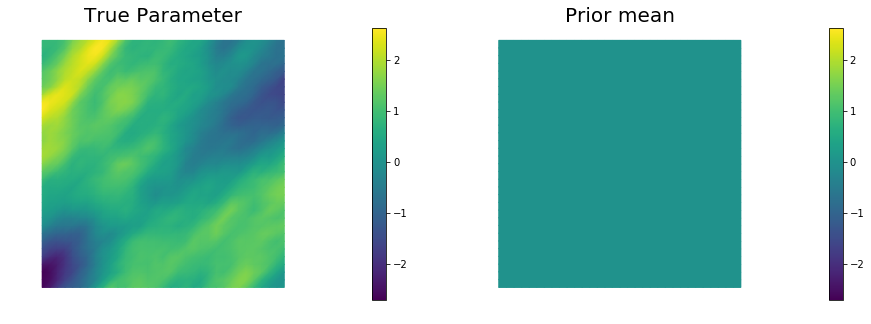

In [5]:
gamma = .1
delta = .5
    
anis_diff = dl.Expression(hp.code_AnisTensor2D, degree=1)
anis_diff.theta0 = 2.
anis_diff.theta1 = .5
anis_diff.alpha = math.pi/4
prior = hp.BiLaplacianPrior(Vh[hp.PARAMETER], gamma, delta, anis_diff)
print("Prior regularization: (delta_x - gamma*Laplacian)^order: delta={0}, gamma={1}, order={2}".format(delta, gamma,2))    


mtrue = true_model(prior)
                   
objs = [dl.Function(Vh[hp.PARAMETER],mtrue), dl.Function(Vh[hp.PARAMETER],prior.mean)]
mytitles = ["True Parameter", "Prior mean"]
hp.nb.multi1_plot(objs, mytitles)
plt.show()


## 5. Set up the misfit functional and generate synthetic observations

To setup the observation operator $\mathcal{B}: \mathcal{V} \mapsto \mathbb{R}^{n_t}$, we generate $n_t$ (`ntargets` in the code below) random locations where to evaluate the value of the state.

Under the assumption of Gaussian additive noise, the likelihood function $\pi_{\rm like}$ has the form

$$\pi_{\rm like}( \data \,| \, m ) \propto \exp\left( -\frac{1}{2}\|\mathcal{B}\,u(m) - \data \|^2_{\Gamma_{\rm noise}^{-1}}\right), $$

where $u(m)$ denotes the solution of the forward model at a given parameter $m$.

The class `PointwiseStateObservation` implements the evaluation of the log-likelihood function and of its partial derivatives w.r.t. the state $u$ and parameter $m$.

To generate the synthetic observation, we first solve the forward problem using the true parameter $m_{\rm true}$. Synthetic observations are obtained by perturbing the state variable at the observation points with a random Gaussian noise.
`rel_noise` is the signal to noise ratio.

Number of observation points: 300


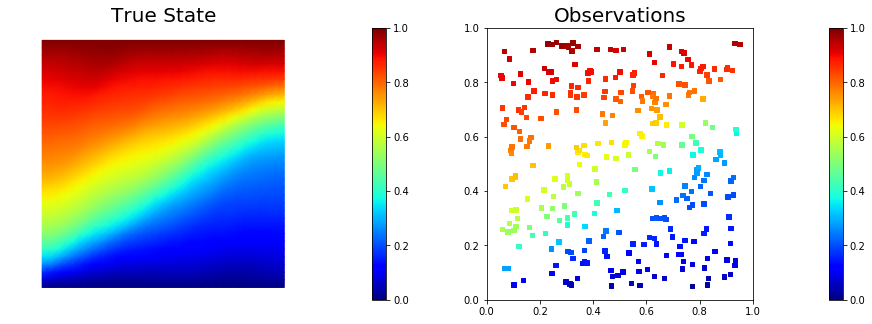

In [20]:
ntargets = 300
rel_noise = 0.005


targets = np.random.uniform(0.05,0.95, [ntargets, ndim] )

print( "Number of observation points: {0}".format(ntargets) )
misfit = hp.PointwiseStateObservation(Vh[hp.STATE], targets) # built in class to define 

utrue = pde.generate_state()

x = [utrue, mtrue, None]

pde.solveFwd(x[hp.STATE], x, 1e-9)
misfit.B.mult(x[hp.STATE], misfit.d) # matrix multiplication

# perturb state with noise.
MAX = misfit.d.norm("linf")
noise_std_dev = rel_noise * MAX
hp.parRandom.normal_perturb(noise_std_dev, misfit.d) # random normals.
misfit.noise_variance = noise_std_dev*noise_std_dev 

vmax = max( utrue.max(), misfit.d.max() )
vmin = min( utrue.min(), misfit.d.min() )

plt.figure(figsize=(15,5))
hp.nb.plot(dl.Function(Vh[hp.STATE], utrue), mytitle="True State", subplot_loc=121, vmin=vmin, vmax=vmax, cmap="jet")
hp.nb.plot_pts(targets, misfit.d, mytitle="Observations", subplot_loc=122, vmin=vmin, vmax=vmax, cmap="jet")
plt.show()

## 6. Set up the model and test gradient and Hessian

The model is defined by three component:
- the `PDEVariationalProblem` `pde` which provides methods for the solution of the forward problem, adjoint problem, and incremental forward and adjoint problems.
- the `BiLaplacianPrior` `prior` which provides methods to apply the regularization (*precision*) operator to a vector or to apply the prior covariance operator (i.e. to solve linear system with the regularization operator)
- the `PointwiseStateObservation` `misfit` which provides methods to compute the cost functional and its partial derivatives with respect to the state and parameter variables.

To test gradient and the Hessian of the model we use forward finite differences.

(yy, H xx) - (xx, H yy) =  1.3506406670584204e-13


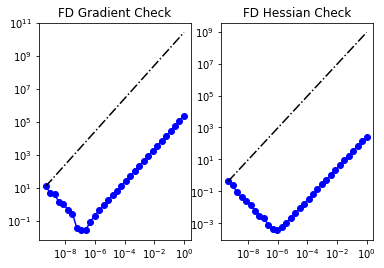

In [7]:
model = hp.Model(pde, prior, misfit)

m0 = dl.interpolate(dl.Expression("sin(x[0])", degree=5), Vh[hp.PARAMETER])
_ = hp.modelVerify(model, m0.vector(), 1e-12)

## 7. Compute the MAP point

We used the globalized Newtown-CG method to compute the MAP point.


It  cg_it cost            misfit          reg             (g,dm)          ||g||L2        alpha          tolcg         
  1   2    6.949835e+03    6.948920e+03    9.146495e-01   -1.726861e+05   2.690263e+05   1.000000e+00   5.000000e-01
  2   3    3.413321e+03    3.412156e+03    1.164728e+00   -7.159787e+03   5.633010e+04   1.000000e+00   4.575862e-01
  3   4    1.148968e+03    1.145975e+03    2.992755e+00   -4.553867e+03   2.831011e+04   1.000000e+00   3.243944e-01
  4   4    6.587888e+02    6.551514e+02    3.637459e+00   -9.816343e+02   1.329225e+04   1.000000e+00   2.222808e-01
  5  10    2.621676e+02    2.528468e+02    9.320879e+00   -8.701229e+02   8.480585e+03   1.000000e+00   1.775479e-01
  6   1    2.275539e+02    2.182301e+02    9.323846e+00   -6.911450e+01   9.436642e+03   1.000000e+00   1.872886e-01
  7   5    2.051550e+02    1.957371e+02    9.417811e+00   -4.499090e+01   3.669465e+03   1.000000e+00   1.167895e-01
  8  31    1.391639e+02    1.168775e+02    2.228638e+01   -1.

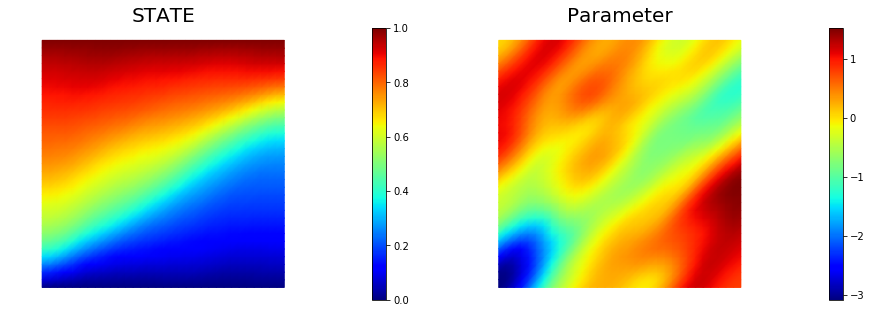

In [21]:
m = prior.mean.copy()
solver = hp.ReducedSpaceNewtonCG(model)
solver.parameters["rel_tolerance"] = 1e-6
solver.parameters["abs_tolerance"] = 1e-12
solver.parameters["max_iter"]      = 25
solver.parameters["inner_rel_tolerance"] = 1e-15
solver.parameters["GN_iter"] = 5 # first few are Gaussian-Newton before switching to Newon
solver.parameters["globalization"] = "LS"
solver.parameters["LS"]["c_armijo"] = 1e-4 # line search - backtracking (or transition matrix). 1e-4 is tough condition

    
x = solver.solve([None, m, None])
    
if solver.converged:
    print( "\nConverged in ", solver.it, " iterations.")
else:
    print( "\nNot Converged")

print( "Termination reason: ", solver.termination_reasons[solver.reason] )
print( "Final gradient norm: ", solver.final_grad_norm )
print( "Final cost: ", solver.final_cost )
print( "Final mean cost: ", solver.final_cost/ntargets )

plt.figure(figsize=(15,5))
hp.nb.plot(dl.Function(Vh[hp.STATE], x[hp.STATE]), subplot_loc=121,mytitle="STATE", cmap="jet")
hp.nb.plot(dl.Function(Vh[hp.PARAMETER], x[hp.PARAMETER]), subplot_loc=122,mytitle="Parameter", cmap="jet")
plt.show()

## 8. Compute the low rank Gaussian approximation of the posterior
We used the *double pass* algorithm to compute a low-rank decomposition of the Hessian Misfit.
In particular, we solve

$$ \matHmis {\bf v}_i = \lambda_i \Gprior^{-1} {\bf v}_i. $$

The Figure shows the largest *k* generalized eigenvectors of the Hessian misfit.
The effective rank of the Hessian misfit is the number of eigenvalues above the red line ($y=1$).
The effective rank is independent of the mesh size.

Single/Double Pass Algorithm. Requested eigenvectors: 100; Oversampling 20.


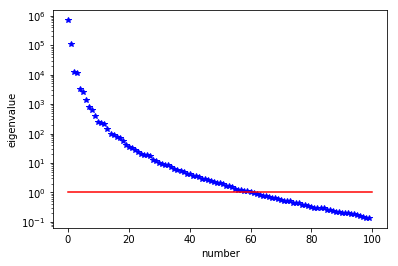

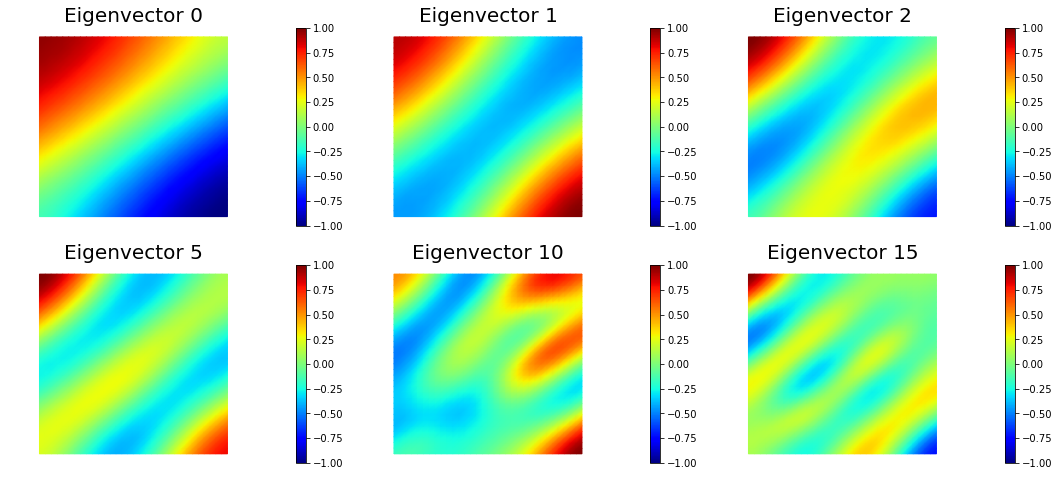

In [23]:
model.setPointForHessianEvaluations(x, gauss_newton_approx=False) # how we compute eigenvalues. assemble all the weak forms at a point.
Hmisfit = hp.ReducedHessian(model, solver.parameters["inner_rel_tolerance"], misfit_only=True) 
# this object above will evaluate the action of the hessian.

k = 100
p = 20
print( "Single/Double Pass Algorithm. Requested eigenvectors: {0}; Oversampling {1}.".format(k,p) )

Omega = hp.MultiVector(x[hp.PARAMETER], k+p)
hp.parRandom.normal(1., Omega)
lmbda, V = hp.doublePassG(Hmisfit, prior.R, prior.Rsolver, Omega, k)

nu = hp.GaussianLRPosterior(prior, lmbda, V) # this implements all the formulas above. it's a class.
nu.mean = x[hp.PARAMETER]

plt.plot(range(0,k), lmbda, 'b*', range(0,k+1), np.ones(k+1), '-r')
plt.yscale('log')
plt.xlabel('number')
plt.ylabel('eigenvalue')

hp.nb.plot_eigenvectors(Vh[hp.PARAMETER], V, mytitle="Eigenvector", which=[0,1,2,5,10,15], cmap="jet")
# below the red line is where the prior is dominating. 

## 9. Prior and LA-posterior pointwise variance fields

LA-Posterior trace 4.155308e+00; Prior trace 5.746868e+00; Correction trace 1.591560e+00


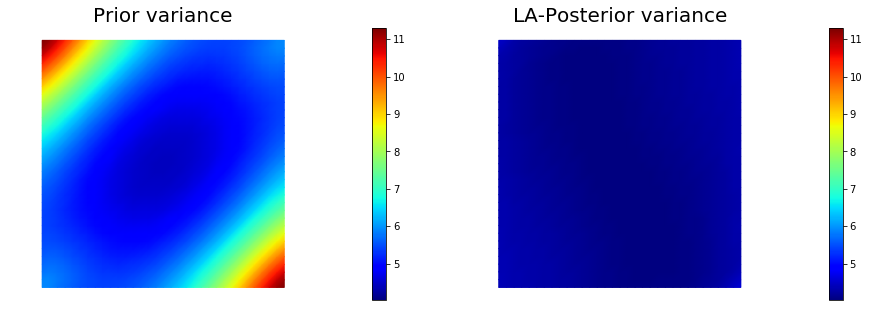

In [25]:
compute_trace = True
if compute_trace:
    post_tr, prior_tr, corr_tr = nu.trace(method="Randomized", r=200)
    print( "LA-Posterior trace {0:5e}; Prior trace {1:5e}; Correction trace {2:5e}".format(post_tr, prior_tr, corr_tr) )
post_pw_variance, pr_pw_variance, corr_pw_variance = nu.pointwise_variance(method="Randomized", r=200)

objs = [dl.Function(Vh[hp.PARAMETER], pr_pw_variance),
        dl.Function(Vh[hp.PARAMETER], post_pw_variance)]
mytitles = ["Prior variance", "LA-Posterior variance"]
hp.nb.multi1_plot(objs, mytitles, logscale=False, cmap="jet")
plt.show()

## 10. Generate samples from Prior and LA-Posterior

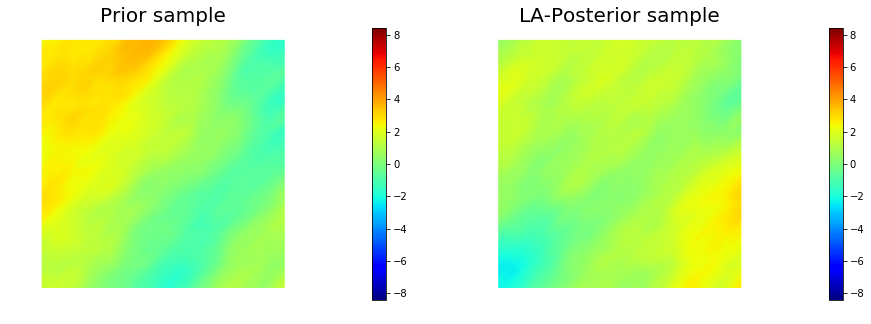

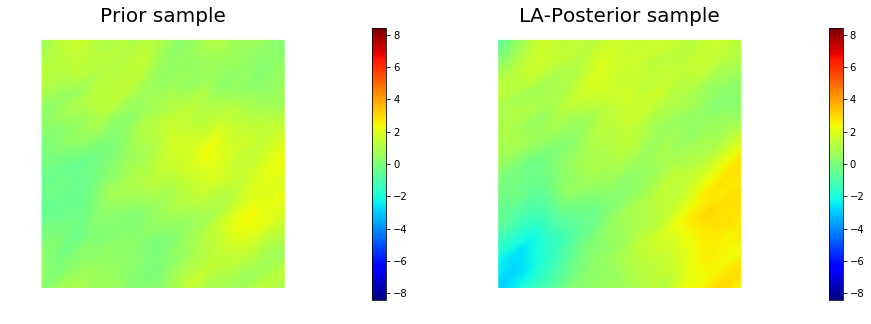

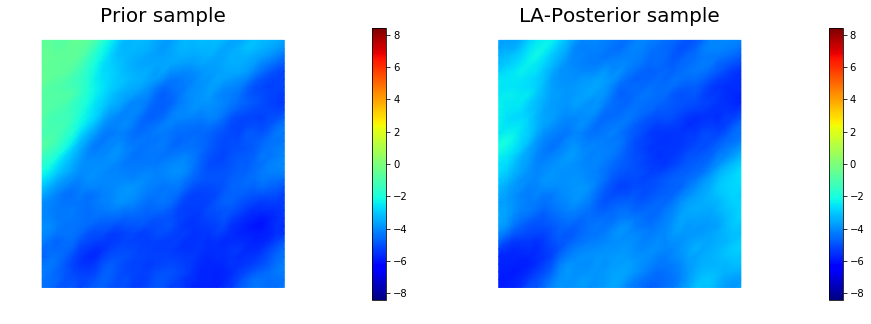

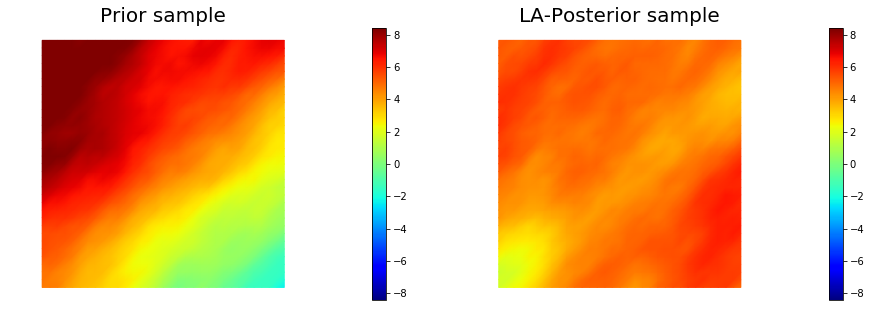

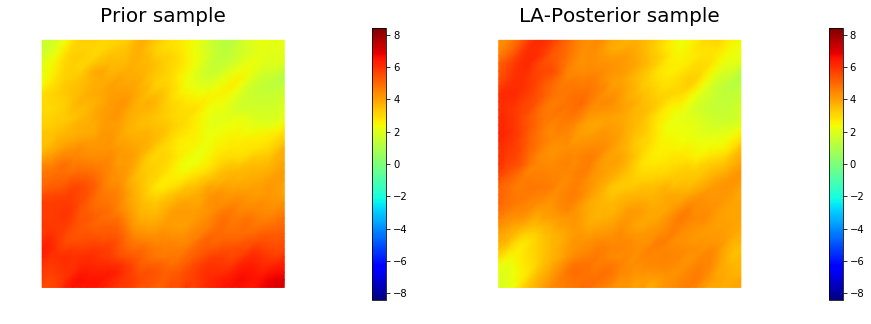

In [28]:
nsamples = 5
noise = dl.Vector()
nu.init_vector(noise,"noise")
s_prior = dl.Function(Vh[hp.PARAMETER], name="sample_prior")
s_post = dl.Function(Vh[hp.PARAMETER], name="sample_post")

pr_max   =  2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.max()
pr_min   = -2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.min()
ps_max   =  2.5*math.sqrt( post_pw_variance.max() ) + nu.mean.max()
ps_min   = -2.5*math.sqrt( post_pw_variance.max() ) + nu.mean.min()

vmax = max(pr_max, ps_max)
vmin = max(pr_min, ps_min)

for i in range(nsamples):
    hp.parRandom.normal(1., noise)
    nu.sample(noise, s_prior.vector(), s_post.vector())
    plt.figure(figsize=(15,5))
    hp.nb.plot(s_prior, subplot_loc=121,mytitle="Prior sample", vmin=vmin, vmax=vmax, cmap="jet")
    hp.nb.plot(s_post, subplot_loc=122,mytitle="LA-Posterior sample", vmin=vmin, vmax=vmax, cmap="jet")
    plt.show()

## 11. Define a quantify of interest

As a quantity of interest, we consider the flux through the bottom boundary:

$$ q(m) = \int_{\Gamma_b} e^m \nabla u \cdot \mathbf{n} \, ds, $$

where the state variable $u$ denotes the pressure, and $\mathbf{n}$ is the unit normal vector to $\Gamma_b$ (the bottom boundary of the domain).

In [16]:
class FluxQOI(object):
    def __init__(self, Vh, dsGamma):
        self.Vh = Vh
        self.dsGamma = dsGamma
        self.n = dl.Constant((0.,1.))#dl.FacetNormal(Vh[hp.STATE].mesh())
        
        self.u = None
        self.m = None
        self.L = {}
        
    def form(self, x):
        return dl.exp(x[hp.PARAMETER])*dl.dot( dl.grad(x[hp.STATE]), self.n)*self.dsGamma
    
    def eval(self, x):
        u = hp.vector2Function(x[hp.STATE], self.Vh[hp.STATE])
        m = hp.vector2Function(x[hp.PARAMETER], self.Vh[hp.PARAMETER])
        return np.log( dl.assemble(self.form([u,m])) )

class GammaBottom(dl.SubDomain):
    def inside(self, x, on_boundary):
        return ( abs(x[1]) < dl.DOLFIN_EPS )

# Boundary observations 
GC = GammaBottom()
marker = dl.FacetFunction("size_t", mesh) # an array with one element for each face
marker.set_all(0)
GC.mark(marker, 1)
dss = dl.Measure("ds", subdomain_data=marker)
qoi = FluxQOI(Vh,dss(1))

## 12. Compute posterior expectations using MCMC

We compute the mean of the quantity of interest $q$ using MCMC with preconditioned Crank-Nicolson proposal (pCN) and generalized preconditioned Crank-Nicolson proposal (gpCN).

### Preconditioned Crank-Nicolson

The pCN algorithm is perhaps the simplest MCMC method that is well-defined  in  the  infinite
dimensional setting, that is that ensures a mixing rates independent of the dimension of the discretized parameter space.

For a given Gaussian prior measure $\mu_{\rm prior} \sim \mathcal{N}(m_{\rm prior}, \mathcal{C}_{\rm prior})$, a negative log likelihood function $\Phi(m, \data) = \frac{1}{2}\| {\bf f}(m) - \data \|^2_{\Gamma_{\rm noise}^{-1}}$, the acceptance ratio of pCN is defined as

$$ a( m_{\rm current}, m_{\rm proposed}) := \min\left\{1, \exp\left( \Phi(m_{\rm current}, \data) - \Phi(m_{\rm proposed}, \data) \right) \right\}.$$

The algorithm below summarizes the pCN method.

1. Set $k = 0$ and pick $m^{(0)}$
2. Set $v^{(k)} = m_{\rm prior} + \sqrt{1 - \beta^2}(m^{(k)} - m_{\rm prior}) + \beta \xi^{(k)}, \quad
\xi^{(k)} \sim \mathcal{N}( 0, \mathcal{C}_{\rm prior} )$
3. Set $m^{(k+1)} = v^{(k)}$ with probability $a(m^{(k)}, v^{(k)})$
4. Set $m^{(k+1)} = m^{(k)}$ otherwise
5. $k \leftarrow k + 1$ and return to 2

Above the parameter $\beta$ controls the step lenght of the pCN proposals. A small $\beta$ will lead to a high acceptance ratio, but the proposed sample will be very similar to the current one, thus leading to poor mixing.
On the other hand, a too large $\beta$ will lead to small acceptance ratio, again leading to poor mixing. Therefore, it is important to find the correct trade-off between a large step-size and a good acceptance ratio.

### Generalized Preconditioned Crank-Nicolson

gpCN is a generalized version of the pCN sampler. While the proposals of pCN are drown from the prior Gaussian distribution $\mu_{\rm prior}$, proposals in the generalized pCN are drown from a Gaussian approximation $\nu$ of the posterior distribution. More specifically, for a given Gaussian prior measure $\mu_{\rm prior} \sim \mathcal{N}(m_{\rm prior}, \mathcal{C}_{\rm prior})$, a negative log likelihood function $\Phi(m, \data) = \frac{1}{2}\| {\bf f}(m) - \data \|^2_{\Gamma_{\rm noise}^{-1}}$, and a proposal Gaussian distribution $\nu \sim \mathcal{N}(m_\nu, \mathcal{C}_\nu)$, the acceptance ratio of gpCN is defined as

$$ a_\nu( m_{\rm current}, m_{\rm proposed}) := \min\left\{1, \exp\left( \Delta(m_{\rm current}) - \Delta(m_{\rm proposed}) \right) \right\}, $$

where

$$ \Delta(m) = \Phi(m, \data) + \frac{1}{2}\| m - m_{\rm prior}\|^2_{\mathcal{C}_{\rm prior}^{-1}} - \frac{1}{2} \| m - m_\nu \|^2_{C_{\nu}^{-1}}. $$

If $\nu$ is a good Gaussian approximation of $\mu_{\rm post}$, one expects $\Delta$ to be smaller that $\Phi$, at least in regions of high posterior probability. This suggests that the generalized pCN will have a better acceptance probability than pCN, leading to more rapid sampling.
The algorithm below summarizes the gpCN method.

1. Set $k = 0$ and pick $m^{(0)}$
2. Set $v^{(k)} = m_\nu + \sqrt{1 - \beta^2}(m^{(k)} - m_\nu) + \beta \xi^{(k)}, \quad
\xi^{(k)} \sim \mathcal{N}( 0, \mathcal{C}_\nu )$
3. Set $m^{(k+1)} = v^{(k)}$ with probability $a_\nu(m^{(k)}, v^{(k)})$
4. Set $m^{(k+1)} = m^{(k)}$ otherwise
5. $k \leftarrow k + 1$ and return to 2

>In the code below we ran the chain for 10,000 samples, this is may not be enough to obtain accurate posterior expectation, however it will still give you a feel on how well the chain is mixing.

In [17]:
def run_chain(kernel):
    noise = dl.Vector()
    nu.init_vector(noise, "noise")
    hp.parRandom.normal(1., noise)
    pr_s = model.generate_vector(hp.PARAMETER)
    post_s = model.generate_vector(hp.PARAMETER)
    # Use a sample from LA-posterior as starting point for the chain
    nu.sample(noise, pr_s, post_s, add_mean=True)

    chain = hp.MCMC(kernel)
    chain.parameters["burn_in"] = 1000
    chain.parameters["number_of_samples"] = 10000
    chain.parameters["print_progress"] = 10            
    tracer = hp.QoiTracer(chain.parameters["number_of_samples"])

    n_accept = chain.run(post_s, qoi, tracer)

    print( "Number accepted = {0}".format(n_accept) )
    print( "E[q] = {0}".format(chain.sum_q/float(chain.parameters["number_of_samples"])) )
    
    q = tracer.data
    
    max_lag = 300
    integrated_corr_time, lags, acorrs = hp.integratedAutocorrelationTime(q, max_lag)
    print ("Integrated autocorrelation time", integrated_corr_time)

    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.plot(q, '*b')
    plt.title("Trace plot")

    plt.subplot(132)
    plt.hist(q, normed=True)
    plt.title("Histogram")

    plt.subplot(133)
    plt.plot(lags, acorrs, '-b') 
    plt.title("Autocorrelation")
    plt.ylim([0., 1.])

    plt.show()

    return tracer

Sampling using pCN proposal
Burn 1000 samples
10.0 % completed, Acceptance ratio 5.0 %
20.0 % completed, Acceptance ratio 4.5 %
30.0 % completed, Acceptance ratio 4.0 %
40.0 % completed, Acceptance ratio 3.5 %
50.0 % completed, Acceptance ratio 3.8 %
60.0 % completed, Acceptance ratio 3.7 %
70.0 % completed, Acceptance ratio 4.4 %
80.0 % completed, Acceptance ratio 4.4 %
90.0 % completed, Acceptance ratio 4.6 %
100.0 % completed, Acceptance ratio 4.8 %
Generate 10000 samples
10.0 % completed, Acceptance ratio 3.4 %
20.0 % completed, Acceptance ratio 3.8 %
30.0 % completed, Acceptance ratio 3.6 %
40.0 % completed, Acceptance ratio 3.6 %
50.0 % completed, Acceptance ratio 3.4 %
60.0 % completed, Acceptance ratio 3.6 %
70.0 % completed, Acceptance ratio 3.6 %
80.0 % completed, Acceptance ratio 3.6 %
90.0 % completed, Acceptance ratio 3.7 %
100.0 % completed, Acceptance ratio 3.7 %
Number accepted = 370
E[q] = -0.6287035017385151
Integrated autocorrelation time 554.959558911


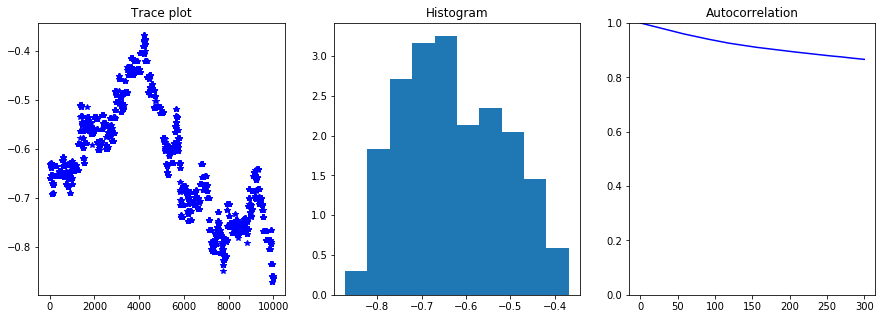

In [18]:
print("Sampling using pCN proposal")
kernel_pCN = hp.pCNKernel(model)
kernel_pCN.parameters["s"] = 0.01
tracer = run_chain(kernel_pCN)

Sampling using gpCN proposal
Burn 1000 samples
10.0 % completed, Acceptance ratio 20.0 %
20.0 % completed, Acceptance ratio 17.0 %
30.0 % completed, Acceptance ratio 15.3 %
40.0 % completed, Acceptance ratio 13.2 %
50.0 % completed, Acceptance ratio 14.4 %
60.0 % completed, Acceptance ratio 13.5 %
70.0 % completed, Acceptance ratio 13.9 %
80.0 % completed, Acceptance ratio 12.2 %
90.0 % completed, Acceptance ratio 11.1 %
100.0 % completed, Acceptance ratio 10.0 %
Generate 10000 samples
10.0 % completed, Acceptance ratio 5.5 %
20.0 % completed, Acceptance ratio 10.4 %
30.0 % completed, Acceptance ratio 11.4 %
40.0 % completed, Acceptance ratio 12.7 %
50.0 % completed, Acceptance ratio 11.8 %
60.0 % completed, Acceptance ratio 11.9 %
70.0 % completed, Acceptance ratio 11.9 %
80.0 % completed, Acceptance ratio 12.5 %
90.0 % completed, Acceptance ratio 11.8 %
100.0 % completed, Acceptance ratio 11.3 %
Number accepted = 1131
E[q] = 0.2332175256894995
Integrated autocorrelation time 126.0071

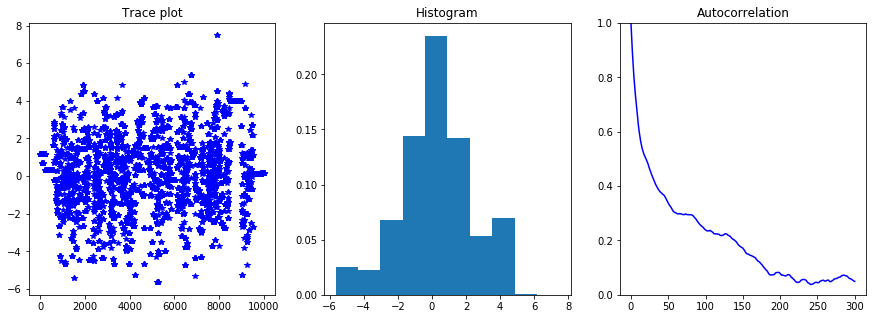

In [19]:
print("Sampling using gpCN proposal")
kernel_gpCN = hp.gpCNKernel(model, nu)
kernel_gpCN.parameters["s"] = 0.9
tracer = run_chain(kernel_gpCN)

Copyright &copy; 2016-2018, The University of Texas at Austin & University of California, Merced.<br>
All Rights reserved.<br>
See file COPYRIGHT for details.

This file is part of the hIPPYlib library. For more information and source code
availability see https://hippylib.github.io.

hIPPYlib is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License (as published by the Free Software Foundation) version 2.0 dated June 1991.